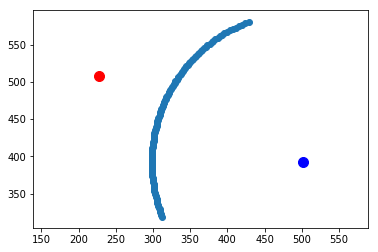

[[429,581],
 [424,579],
 [419,577],
 [415,575],
 [411,573],
 [407,571],
 [403,569],
 [400,567],
 [396,565],
 [393,563],
 [390,561],
 [387,559],
 [384,557],
 [381,555],
 [379,553],
 [376,551],
 [373,549],
 [371,547],
 [369,545],
 [366,543],
 [364,541],
 [362,539],
 [360,537],
 [358,535],
 [356,533],
 [354,531],
 [352,529],
 [350,527],
 [348,525],
 [347,523],
 [345,521],
 [343,519],
 [342,517],
 [340,515],
 [339,513],
 [337,511],
 [336,509],
 [334,507],
 [333,505],
 [332,503],
 [330,501],
 [329,499],
 [328,497],
 [327,495],
 [326,493],
 [324,491],
 [323,489],
 [322,487],
 [321,485],
 [320,483],
 [319,481],
 [318,479],
 [317,477],
 [316,475],
 [315,473],
 [315,471],
 [314,469],
 [313,467],
 [312,465],
 [311,463],
 [311,461],
 [310,459],
 [309,457],
 [309,455],
 [308,453],
 [307,451],
 [307,449],
 [306,447],
 [306,445],
 [305,443],
 [305,441],
 [304,439],
 [304,437],
 [303,435],
 [303,433],
 [302,431],
 [302,429],
 [302,427],
 [301,425],
 [301,423],
 [301,421],
 [300,419],
 [300,417],
 [30

In [134]:
%matplotlib inline

# General libraries.
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos,sin,arccos,sqrt

def inv_parametric_circle(x,xc,R):
    t = arccos((x-xc)/R)
    return t

def parametric_circle(t,xc,yc,R):
    x = xc + R*cos(t)
    y = yc + R*sin(t)
    return np.array((x, y)).astype(int)

def find_center(p1, p2, angle):
    # End points of the chord
    x1, y1 = p1 
    x2, y2 = p2 

    # Slope of the line through the chord
    slope = (y1-y2)/(x1-x2)

    # Slope of a line perpendicular to the chord
    new_slope = -1/slope

    # Point on the line perpendicular to the chord
    # Note that this line also passes through the center of the circle
    xm, ym = (x1+x2)/2, (y1+y2)/2
#    plt.scatter([x1],[y1],color='y',s=100, label='p1')
#    plt.scatter([x2],[y2],color='y',s=100)
#    plt.scatter([xm],[ym],color='g',s=100)

    # Distance between p1 and p2
    d_chord = sqrt((x1-x2)**2 + (y1-y2)**2)

    # Distance between xm, ym and center of the circle (xc, yc)
    d_perp = d_chord/(2*np.tan(angle))

    # Equation of line perpendicular to the chord: y-ym = new_slope(x-xm)
    # Distance between xm,ym and xc, yc: (yc-ym)^2 + (xc-xm)^2 = d_perp^2
    # Substituting from 1st to 2nd equation for y,
    #   we get: (new_slope^2+1)(xc-xm)^2 = d^2

    # Solve for xc:
    xc = int((d_perp)/sqrt(new_slope**2+1))
    xc2 = int(xm + np.abs(xm - xc))
    # Solve for yc:
    yc = int((new_slope)*(xc-xm)+ym)
    yc2 = int((new_slope)*(xc2-xm)+ym)
    return [[xc,yc], [xc2, yc2]]


def getPointsForCenter(x1, x2, C, R,N):
    start_t = inv_parametric_circle(x1, C[0], R)
    end_t   = inv_parametric_circle(x2, C[0], R)
    
    arc_T = np.linspace(start_t, end_t, N)
    
    X,Y = parametric_circle(arc_T, C[0], C[1], R) if C[0] < C[1] else parametric_circle(arc_T, C[1], C[0], R)
    # Now calculate N points between (x1,y1) and (x2,y2)
    #points = np.append(np.array([X]).T, np.array([Y]).T, 1)

    return X,Y
    
def getX(Y, C, R, max_x):
    # This can be: C[0] +- sqrt(R**2 - (C[1]-Y)**2)
    if (max_x < C[0]):
        X = C[0] - sqrt(R**2 - (C[1]-Y)**2)
    else:
        X = C[0] + sqrt(R**2 - (C[1]-Y)**2)

    return X.astype(int)

#Given a point (Px, Py), that point's starting angle (Pa), and the radius (r), 
# you can calculate the center (Cx, Cy) like so:
def getPoints(x1, y1, x2, y2, N):
    # calculate radius
    R = int(sqrt(((x1-x2)**2 + (y1-y2)**2)/2))

#    print("R", R)
    
    # Assume angle = pi/6
    C1, C2 = find_center([x1,y1], [x2,y2], np.pi/6)
#    print(C1,C2)
    
    #X,Y = getPointsForCenter(x1, x2, C1, R,N) if x1 < x2 else getPointsForCenter(x2, x1, C1, R,N)
    #plt.scatter(X,Y)
    #X,Y = getPointsForCenter(x1, x2, C2, R, N) if x1 < x2 else getPointsForCenter(x2, x1, C2, R,N)
    #plt.scatter(X,Y)
    
    # Find 100 Ys
    step = int(np.abs(y1-y2)/N)
#    print(step)
    if (y1 < y2):
        Y = np.arange(y1,y2,step)
    else:
        Y = np.flipud(np.arange(y2,y1,step))

    # Now get Xs
    X = getX(Y, C2, R, max(x1,x2))
    #print(X,Y)
    points = np.append(np.array([X]).T, np.array([Y]).T, 1)
#    print(points)
       
    plt.scatter([C1[0]],[C1[1]],color='r',s=100)
    plt.scatter([C2[0]],[C2[1]],color='b',s=100)
    plt.scatter(X,Y)
    plt.axis('equal')
    plt.show()
    return (points)
    

#ARG[420,582] -> US [308,319]
points = getPoints(420,582,308,319, 100)
#points = getPoints(308,319, 420,582, 100)
print(np.array2string(points,separator=','))


In [28]:
a1 = [1,1,1,1]
a2 = [2,2,2,2]
np.append(np.array([a1]).T, np.array([a2]).T, 1)

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [89]:
step = int((420-308)/100)
print(step)
np.flipud(np.arange(308, 420,step))

1


array([419, 418, 417, 416, 415, 414, 413, 412, 411, 410, 409, 408, 407,
       406, 405, 404, 403, 402, 401, 400, 399, 398, 397, 396, 395, 394,
       393, 392, 391, 390, 389, 388, 387, 386, 385, 384, 383, 382, 381,
       380, 379, 378, 377, 376, 375, 374, 373, 372, 371, 370, 369, 368,
       367, 366, 365, 364, 363, 362, 361, 360, 359, 358, 357, 356, 355,
       354, 353, 352, 351, 350, 349, 348, 347, 346, 345, 344, 343, 342,
       341, 340, 339, 338, 337, 336, 335, 334, 333, 332, 331, 330, 329,
       328, 327, 326, 325, 324, 323, 322, 321, 320, 319, 318, 317, 316,
       315, 314, 313, 312, 311, 310, 309, 308])